# Convolutional Neural Networks (CNN) for MNIST dataset
The examples in this notebook assume that you are familiar with the theory of the neural networks. To learn more about the neural networks, you can refer resources in the readme file.

## Import necessary modules

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017)  

## Import MNIST Dataset  

In [2]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols

Using Theano backend.


## Data Pre-processing

In [3]:
from keras.utils import np_utils
train_features = train_features.reshape(train_features.shape[0], 1, img_rows, img_cols).astype('float32')
test_features = test_features.reshape(test_features.shape[0], 1, img_rows, img_cols).astype('float32')
train_features /= 255
test_features /= 255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Function to plot model accuracy and loss 

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

## Funtion to compute test accuracy

In [5]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

## Import Keras modules

In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization

## A Simple CNN

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
31s - loss: 0.3425 - acc: 0.9042 - val_loss: 0.1285 - val_acc: 0.9665
Epoch 2/20
31s - loss: 0.1029 - acc: 0.9712 - val_loss: 0.0794 - val_acc: 0.9780
Epoch 3/20
30s - loss: 0.0700 - acc: 0.9802 - val_loss: 0.0694 - val_acc: 0.9805
Epoch 4/20
31s - loss: 0.0568 - acc: 0.9834 - val_loss: 0.0612 - val_acc: 0.9834
Epoch 5/20
31s - loss: 0.0492 - acc: 0.9852 - val_loss: 0.0612 - val_acc: 0.9829
Epoch 6/20
30s - loss: 0.0425 - acc: 0.9875 - val_loss: 0.0557 - val_acc: 0.9832
Epoch 7/20
30s - loss: 0.0379 - acc: 0.9888 - val_loss: 0.0565 - val_acc: 0.9829
Epoch 8/20
30s - loss: 0.0353 - acc: 0.9896 - val_loss: 0.0525 - val_acc: 0.9842
Epoch 9/20
30s - loss: 0.0315 - acc: 0.9904 - val_loss: 0.0502 - val_acc: 0.9845
Epoch 10/20
29s - loss: 0.0287 - acc: 0.9916 - val_loss: 0.0521 - val_acc: 0.9847
Epoch 11/20
29s - loss: 0.0255 - acc: 0.9921 - val_loss: 0.0544 - val_acc: 0.9837
Epoch 12/20
30s - loss: 0.0226 - acc: 0.9936 - val_loss: 

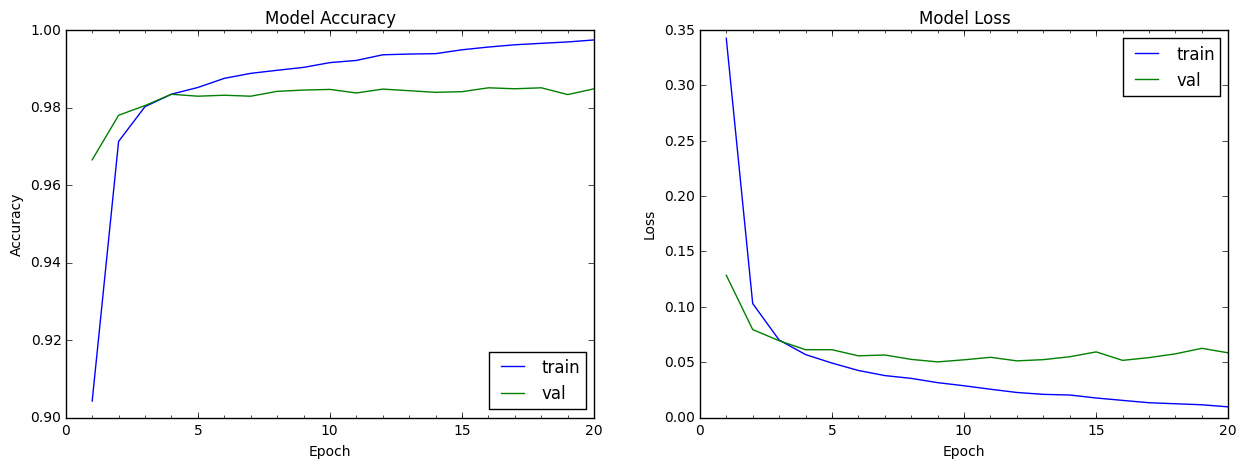

Model took 646.50 seconds to train
Accuracy on test data is: 98.63


In [7]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28))) 
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(num_classes))
model1.add(Activation("softmax"))
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model1_info = model1.fit(train_features, train_labels, batch_size=128, nb_epoch=20, verbose=2, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model1_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1)

## Add additional fully connected layer

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
37s - loss: 0.2143 - acc: 0.9379 - val_loss: 0.0818 - val_acc: 0.9760
Epoch 2/20
38s - loss: 0.0642 - acc: 0.9805 - val_loss: 0.0590 - val_acc: 0.9821
Epoch 3/20
41s - loss: 0.0434 - acc: 0.9870 - val_loss: 0.0505 - val_acc: 0.9851
Epoch 4/20
43s - loss: 0.0315 - acc: 0.9902 - val_loss: 0.0496 - val_acc: 0.9857
Epoch 5/20
39s - loss: 0.0229 - acc: 0.9931 - val_loss: 0.0478 - val_acc: 0.9858
Epoch 6/20
40s - loss: 0.0178 - acc: 0.9946 - val_loss: 0.0475 - val_acc: 0.9873
Epoch 7/20
41s - loss: 0.0142 - acc: 0.9958 - val_loss: 0.0567 - val_acc: 0.9837
Epoch 8/20
39s - loss: 0.0102 - acc: 0.9970 - val_loss: 0.0467 - val_acc: 0.9876
Epoch 9/20
47s - loss: 0.0082 - acc: 0.9976 - val_loss: 0.0444 - val_acc: 0.9883
Epoch 10/20
40s - loss: 0.0061 - acc: 0.9982 - val_loss: 0.0513 - val_acc: 0.9876
Epoch 11/20
39s - loss: 0.0082 - acc: 0.9970 - val_loss: 0.0476 - val_acc: 0.9886
Epoch 12/20
37s - loss: 0.0066 - acc: 0.9976 - val_loss: 

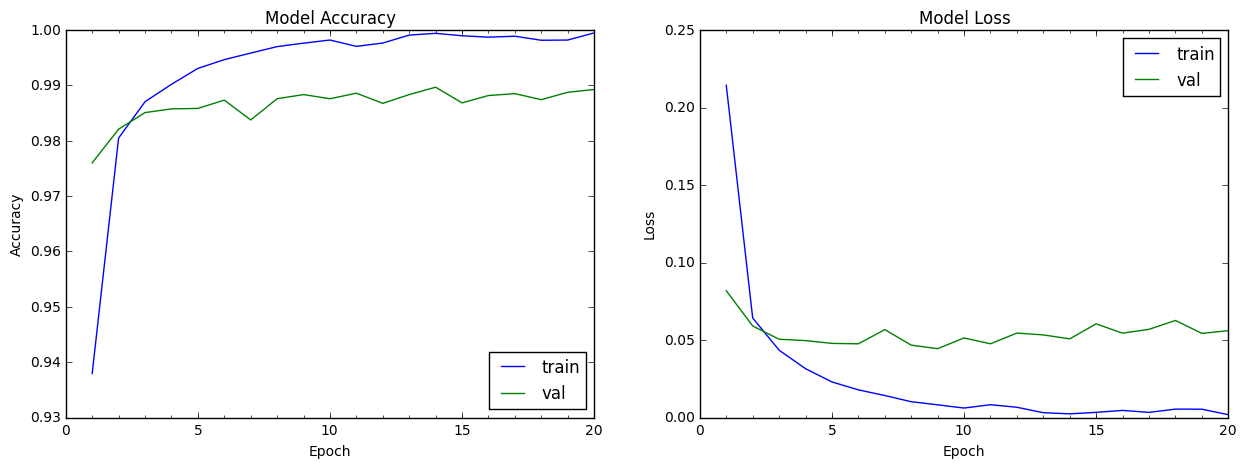

Model took 814.36 seconds to train
Accuracy on test data is: 98.88


In [8]:
# Define the model
model2 = Sequential()
model2.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28))) 
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation("relu"))
model2.add(Dense(num_classes))
model2.add(Activation("softmax"))
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model2_info = model2.fit(train_features, train_labels, batch_size=128, nb_epoch=20, verbose=2, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model2_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2)

## Increase network depth by adding multiple layers

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
121s - loss: 0.2081 - acc: 0.9406 - val_loss: 0.0630 - val_acc: 0.9815
Epoch 2/20
121s - loss: 0.0538 - acc: 0.9838 - val_loss: 0.0480 - val_acc: 0.9861
Epoch 3/20
126s - loss: 0.0347 - acc: 0.9890 - val_loss: 0.0531 - val_acc: 0.9838
Epoch 4/20
128s - loss: 0.0239 - acc: 0.9925 - val_loss: 0.0437 - val_acc: 0.9876
Epoch 5/20
125s - loss: 0.0170 - acc: 0.9947 - val_loss: 0.0442 - val_acc: 0.9876
Epoch 6/20
127s - loss: 0.0145 - acc: 0.9950 - val_loss: 0.0512 - val_acc: 0.9854
Epoch 7/20
142s - loss: 0.0107 - acc: 0.9963 - val_loss: 0.0444 - val_acc: 0.9882
Epoch 8/20
148s - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0555 - val_acc: 0.9872
Epoch 9/20
136s - loss: 0.0075 - acc: 0.9976 - val_loss: 0.0498 - val_acc: 0.9882
Epoch 10/20
121s - loss: 0.0065 - acc: 0.9979 - val_loss: 0.0497 - val_acc: 0.9873
Epoch 11/20
117s - loss: 0.0059 - acc: 0.9981 - val_loss: 0.0530 - val_acc: 0.9878
Epoch 12/20
118s - loss: 0.0047 - acc: 0.9987 

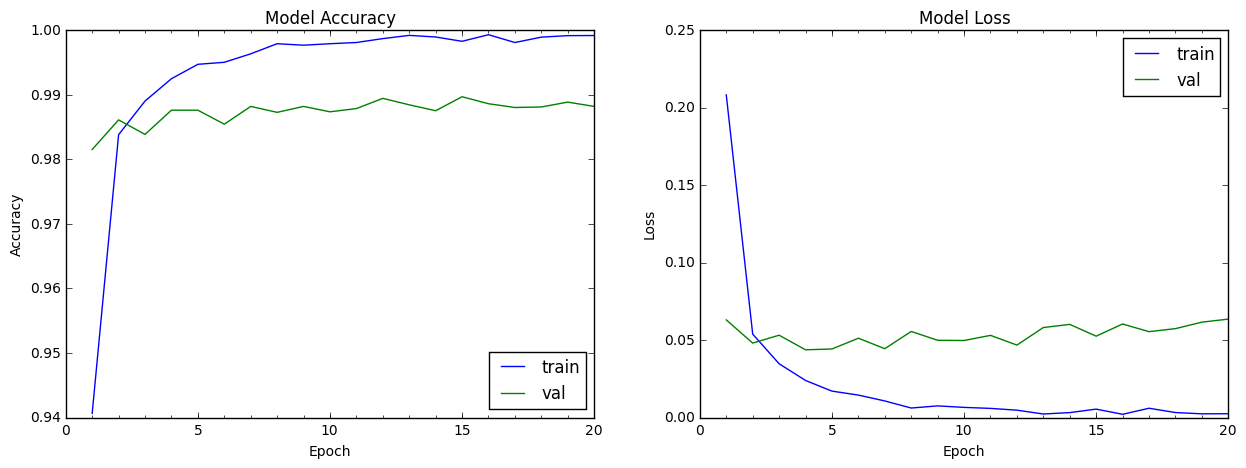

Model took 2496.97 seconds to train
Accuracy on test data is: 98.93


In [9]:
# Define the model
model3 = Sequential()
model3.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 28, 28)))
model3.add(Activation("relu"))
model3.add(Convolution2D(32, 3, 3,  border_mode='valid'))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation("relu"))
model3.add(Dense(num_classes))
model3.add(Activation("softmax"))
# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model3_info = model3.fit(train_features, train_labels, batch_size=128, nb_epoch=20, verbose=2, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model3_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model3)

## Add Droput Layer and Batch Normalization

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
307s - loss: 0.5792 - acc: 0.9217 - val_loss: 0.7829 - val_acc: 0.9788
Epoch 2/20
304s - loss: 0.2892 - acc: 0.9717 - val_loss: 0.1357 - val_acc: 0.9865
Epoch 3/20
306s - loss: 0.2037 - acc: 0.9793 - val_loss: 0.1154 - val_acc: 0.9872
Epoch 4/20
306s - loss: 0.1532 - acc: 0.9823 - val_loss: 0.0779 - val_acc: 0.9882
Epoch 5/20
305s - loss: 0.1257 - acc: 0.9846 - val_loss: 0.0664 - val_acc: 0.9892
Epoch 6/20
306s - loss: 0.1023 - acc: 0.9863 - val_loss: 0.0577 - val_acc: 0.9889
Epoch 7/20
306s - loss: 0.0884 - acc: 0.9873 - val_loss: 0.0468 - val_acc: 0.9902
Epoch 8/20
303s - loss: 0.0769 - acc: 0.9886 - val_loss: 0.0410 - val_acc: 0.9904
Epoch 9/20
303s - loss: 0.0656 - acc: 0.9902 - val_loss: 0.0439 - val_acc: 0.9892
Epoch 10/20
302s - loss: 0.0598 - acc: 0.9899 - val_loss: 0.0376 - val_acc: 0.9920
Epoch 11/20
303s - loss: 0.0533 - acc: 0.9912 - val_loss: 0.0337 - val_acc: 0.9924
Epoch 12/20
303s - loss: 0.0453 - acc: 0.9926 

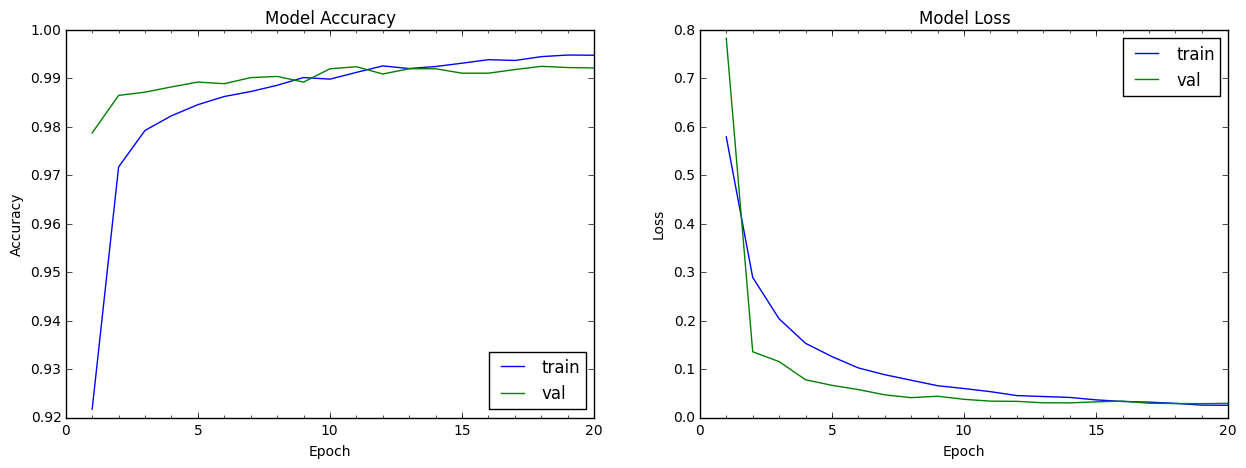

Model took 6158.77 seconds to train
Accuracy on test data is: 99.20


In [11]:
# Define the model
model4 = Sequential()
model4.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 28, 28)))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(Convolution2D(32, 3, 3,  border_mode='valid'))
model4.add(BatchNormalization())
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128))
model4.add(Dropout(0.5))
model4.add(Activation("relu"))
model4.add(Dense(num_classes))
model4.add(BatchNormalization())
model4.add(Activation("softmax"))
# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model4_info = model4.fit(train_features, train_labels, batch_size=128, nb_epoch=20, verbose=2, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model4_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model4)